### OBJECTIVE: TECHNICAL ANALYSIS of a Car company
   Based on the data of a Digital Marketing company by their Marketing Intelligence team, it is required to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups. 
***
The following three features are used in digital marketing:  

CPM = (Total Campaign Spend / Number of Impressions) * 1,000  
CPC = Total Cost (spend) / Number of Clicks  
CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

#### Following Analysis will be done -
Use Clustering procedure to segment ads into homogeneous groups.


## GITHUB Repository URL
### https://github.com/rakesh82rawat?tab=repositories

## Kaggle Code URL
### https://www.kaggle.com/rakesh82rawat/code


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

import warnings
warnings.filterwarnings('ignore')

### Data Reading and basic Analysis

In [3]:
df=pd.read_excel("Clustering_CleanAds_Data.xlsx")
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,NaN


In [4]:
df.shape

#> There are 25875 observations and 19 features in the dataset 

(25857, 19)

In [5]:
df.duplicated().sum()

#OBS> No duplicates found

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [7]:
df.isna().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

In [8]:
round(df.describe().T,ndigits=2)

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,390.43,230.70,120.00,120.00,300.00,720.00,728.00
Ad- Width,25857.0,332.18,194.26,70.00,250.00,300.00,600.00,600.00
Ad Size,25857.0,99683.28,62640.69,33600.00,72000.00,75000.00,84000.00,216000.00
Available_Impressions,25857.0,2169620.83,4542680.20,0.00,9133.00,330968.00,2208484.00,27592861.00
Matched_Queries,25857.0,1155321.80,2407243.93,0.00,5451.00,189449.00,1008171.00,14702025.00
Impressions,25857.0,1107525.30,2326647.65,0.00,2558.00,162162.00,949693.00,14194774.00
Clicks,25857.0,9525.88,16721.69,0.00,305.00,3457.00,10681.00,143049.00
Spend,25857.0,2414.47,3932.84,0.00,36.03,1173.66,2692.28,26931.87
Fee,25857.0,0.34,0.03,0.21,0.35,0.35,0.35,0.35
Revenue,25857.0,1716.55,2993.03,0.00,23.42,762.88,1749.98,21276.18


##### Changing Datatype of Timestamp from Object to datetime64

In [9]:
# Exploring the Timestamp feature for better understanding

df.Timestamp.sample(20)




139        2020-9-13-0
10206     2020-9-29-22
2886      2020-10-6-20
9392      2020-9-18-12
17338     2020-11-17-0
22642     2020-11-19-6
10930    2020-11-11-12
4771        2020-9-7-0
7970      2020-11-24-1
14760     2020-9-27-19
1646      2020-9-21-23
959      2020-10-24-15
7701       2020-10-4-5
11381     2020-11-6-15
25516     2020-10-7-17
5658      2020-9-27-22
21877     2020-11-14-0
2526        2020-9-2-0
8729       2020-9-26-0
20350    2020-10-23-20
Name: Timestamp, dtype: object

  OBSERVATIONS AND ACTION ITEMS  
  
  From above analysis, We observed that the Time stamp feature is in the format : yyyy-mm-dd-hh
* Timestamp has current dType as "Object". We will convert it into datetime format
* There are 3 Features with nan values. These are- CTR(25% nan/6465), CPM(25% nan/6465) and CTC(29% nan/7527)

In [10]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='%Y-%m-%d-%H')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              25857 non-null  datetime64[ns]
 1   InventoryType          25857 non-null  object        
 2   Ad - Length            25857 non-null  int64         
 3   Ad- Width              25857 non-null  int64         
 4   Ad Size                25857 non-null  int64         
 5   Ad Type                25857 non-null  object        
 6   Platform               25857 non-null  object        
 7   Device Type            25857 non-null  object        
 8   Format                 25857 non-null  object        
 9   Available_Impressions  25857 non-null  int64         
 10  Matched_Queries        25857 non-null  int64         
 11  Impressions            25857 non-null  int64         
 12  Clicks                 25857 non-null  int64         
 13  S

In [12]:
display(df.isna().sum())
display(df.isna().mean())

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

Timestamp                0.000000
InventoryType            0.000000
Ad - Length              0.000000
Ad- Width                0.000000
Ad Size                  0.000000
Ad Type                  0.000000
Platform                 0.000000
Device Type              0.000000
Format                   0.000000
Available_Impressions    0.000000
Matched_Queries          0.000000
Impressions              0.000000
Clicks                   0.000000
Spend                    0.000000
Fee                      0.000000
Revenue                  0.000000
CTR                      0.250029
CPM                      0.250029
CPC                      0.291101
dtype: float64

##### Missing Values imputation

OBSERVATIONS :   
There are 3 Features with nan values. These are-   
CTR(25% nan/6465),   
CPM(25% nan/6465) and  
CTC(29% nan/7527)  

    > Lets explore the distribution in all 3 features

In [13]:
df_mscols = df[['CTR','CPM','CPC']]

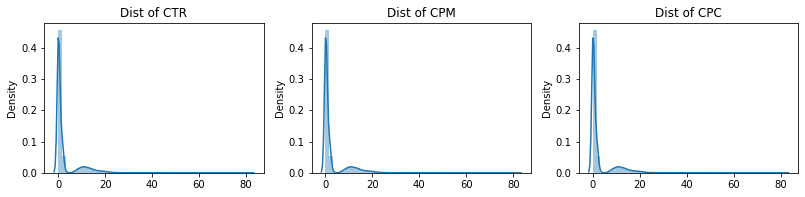

In [14]:
ms_cols=df_mscols.columns

plt.figure(figsize = (15,10))
for i in range(len(ms_cols)):
    plt.subplot(4, 4, i + 1)  # 4 Rows , 4 cols , 1 to #c-len
    sns.distplot(df_mscols)
    plt.title('Dist of {}'.format(ms_cols[i]))
    plt.tight_layout()
    
#> OBS: Excluding the nan values, The distribution looks normal for all 3 Features. 
    #To keep the data symmetric we will impute the null values with median

As the computation method of all 3 paramenters are given, we will use the same to fill the null values

In [15]:
#CPM = (Total Campaign Spend / Number of Impressions) * 1,000
#CPC = Total Cost (spend) / Number of Clicks
#CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

def cal_cpm(x): 
    spend=df.Spend 
    impressions=df.Impressions
    cpm = (spend/impressions)*1000
    return cpm

def cal_cpc(x): 
    clicks=df.Clicks 
    spend=df.Spend
    cpc = (spend/clicks)
    return cpc

def cal_ctr(x): 
    clicks=df.Clicks 
    impressions=df.Impressions
    ctr = (clicks/impressions)*100
    return ctr

In [16]:
df['CPM']= df[['CPM']].apply(lambda x: cal_cpm(x))
df['CPC']= df[['CPC']].apply(lambda x: cal_cpc(x))
df['CTR']= df[['CTR']].apply(lambda x: cal_ctr(x))

In [17]:
display(df.isna().sum())
display(df.isna().mean())

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                       219
CPM                       219
CPC                      2586
dtype: int64

Timestamp                0.000000
InventoryType            0.000000
Ad - Length              0.000000
Ad- Width                0.000000
Ad Size                  0.000000
Ad Type                  0.000000
Platform                 0.000000
Device Type              0.000000
Format                   0.000000
Available_Impressions    0.000000
Matched_Queries          0.000000
Impressions              0.000000
Clicks                   0.000000
Spend                    0.000000
Fee                      0.000000
Revenue                  0.000000
CTR                      0.008470
CPM                      0.008470
CPC                      0.100012
dtype: float64

After imputation the missing values are reduced to - CTR(0.8% nan/219), CPM(.8% nan/219) and CTC(10% nan/2586)
The remaining null values are present due to null value in the parameters (impressions, clicks and sales). We will remove these rows from the dataset for further analysis.

In [19]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [20]:
df.dropna(subset=['CPM'], inplace=True)
df.dropna(subset=['CPC'], inplace=True)
df.dropna(subset=['CTR'], inplace=True)

In [21]:
df.isnull().sum()
#ALl null values treated

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23066 entries, 0 to 25854
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  int64         
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  int64         
 10  Matched_Queries        23066 non-null  int64         
 11  Impressions            23066 non-null  int64         
 12  Clicks                 23066 non-null  int64         
 13  S

#### Checking and Treating Outliers

If Outliers are treated after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)

So, if you are about to use a procedure where scaled data in needed, we should definitely remove your outliers first, then standardize. Otherwise you may end up with different variables having different standard deviations (which is an issue, for example, in PCA analysis)

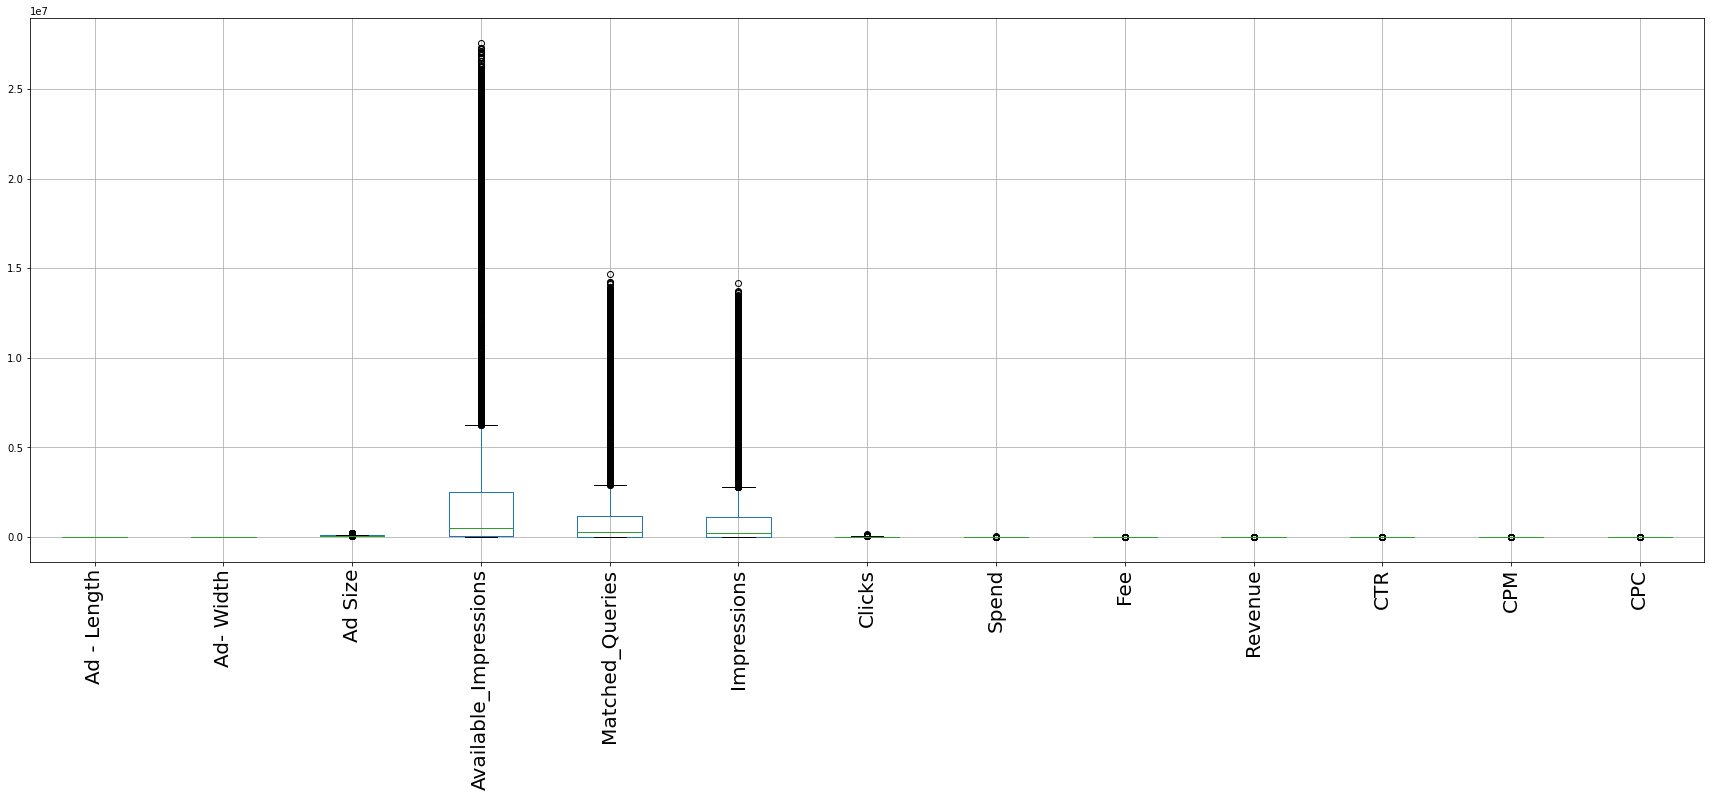

In [23]:
# Boxplot (1st Method)

df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)

df_num.boxplot(figsize=(30,10));
plt.xticks(fontsize=20, rotation=90);
#sns.boxplot(data=df[lstnumericcolumns]);

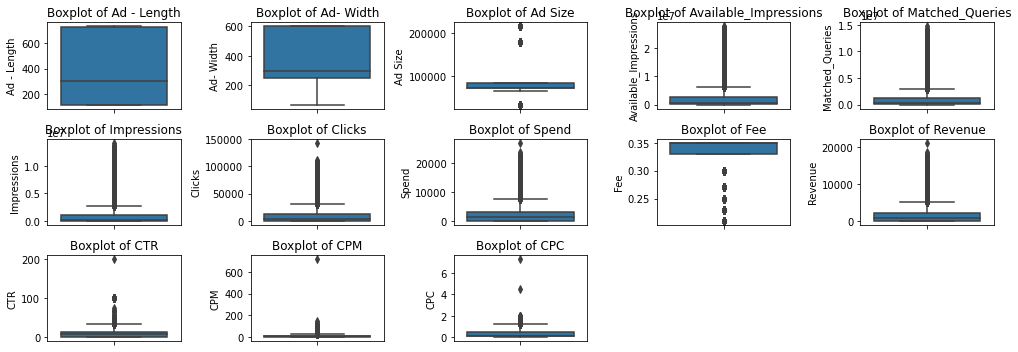

In [24]:
# Boxplot (2nd Method)

plt.figure(figsize = (14,5))
col_list = df_num.columns
for i in range(len(col_list)):
    plt.subplot(3, 5, i + 1)  # 3Rows , 5cols i.e 1 to #c-len
    sns.boxplot(y = df_num[col_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(col_list[i]))
    plt.tight_layout()

OBS (outliers) : From the above set of box plots, its evident that Outliers are present in all numeric Features except for Ad-length and Ad-width

In [26]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_num[column].describe(),end=' ')
        
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_num[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_num[column])
    plt.show()

In [27]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_num[column].describe(),end=' ')
        
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df_num[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_num[column])
    plt.show()

Description of Ad - Length
----------------------------------------------------------------------------
count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64 Distribution of Ad - Length
----------------------------------------------------------------------------


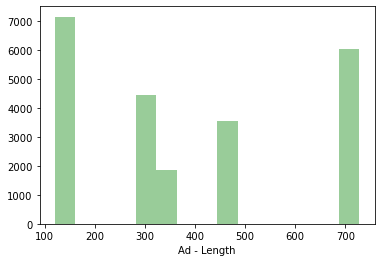

BoxPlot of Ad - Length
----------------------------------------------------------------------------


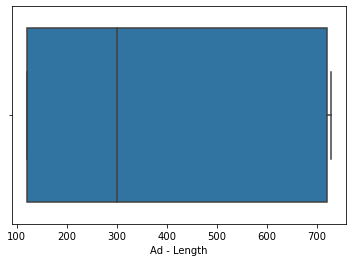

Description of Ad- Width
----------------------------------------------------------------------------
count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64 Distribution of Ad- Width
----------------------------------------------------------------------------


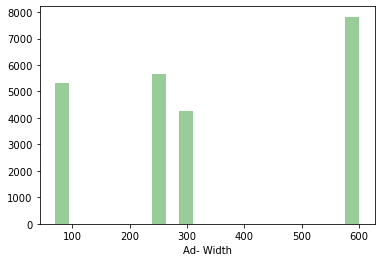

BoxPlot of Ad- Width
----------------------------------------------------------------------------


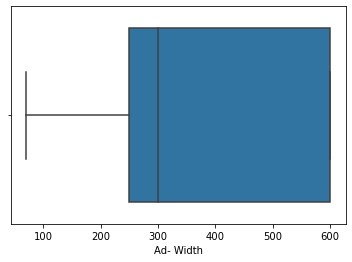

Description of Ad Size
----------------------------------------------------------------------------
count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64 Distribution of Ad Size
----------------------------------------------------------------------------


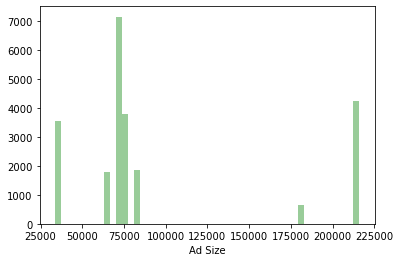

BoxPlot of Ad Size
----------------------------------------------------------------------------


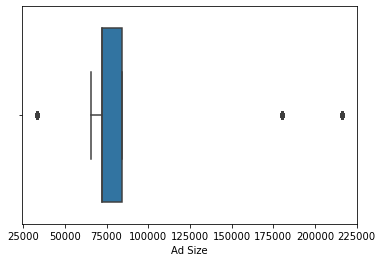

Description of Available_Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64 Distribution of Available_Impressions
----------------------------------------------------------------------------


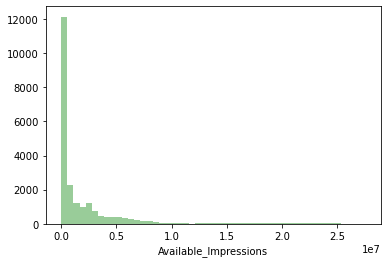

BoxPlot of Available_Impressions
----------------------------------------------------------------------------


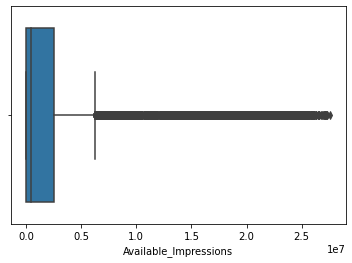

Description of Matched_Queries
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64 Distribution of Matched_Queries
----------------------------------------------------------------------------


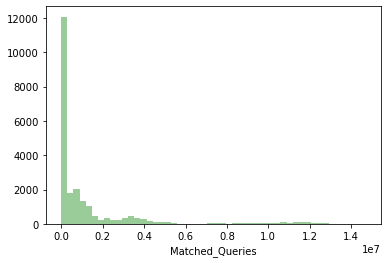

BoxPlot of Matched_Queries
----------------------------------------------------------------------------


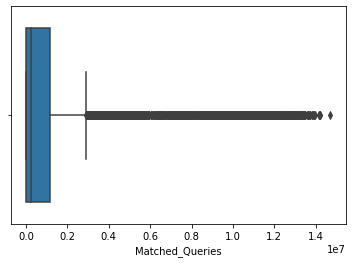

Description of Impressions
----------------------------------------------------------------------------
count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64 Distribution of Impressions
----------------------------------------------------------------------------


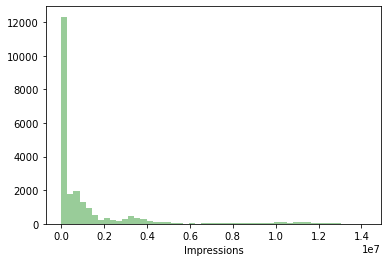

BoxPlot of Impressions
----------------------------------------------------------------------------


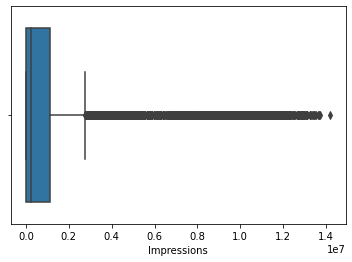

Description of Clicks
----------------------------------------------------------------------------
count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64 Distribution of Clicks
----------------------------------------------------------------------------


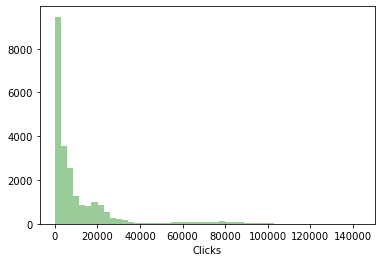

BoxPlot of Clicks
----------------------------------------------------------------------------


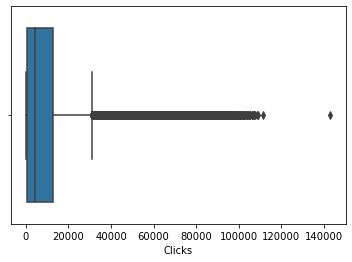

Description of Spend
----------------------------------------------------------------------------
count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64 Distribution of Spend
----------------------------------------------------------------------------


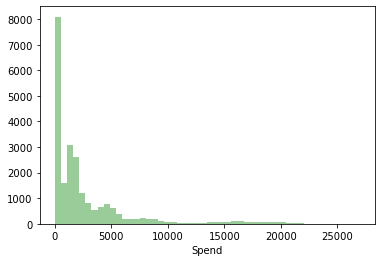

BoxPlot of Spend
----------------------------------------------------------------------------


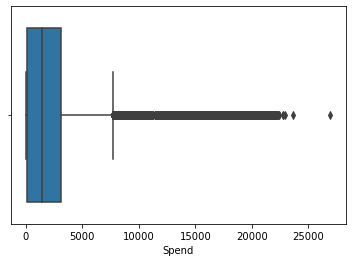

Description of Fee
----------------------------------------------------------------------------
count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64 Distribution of Fee
----------------------------------------------------------------------------


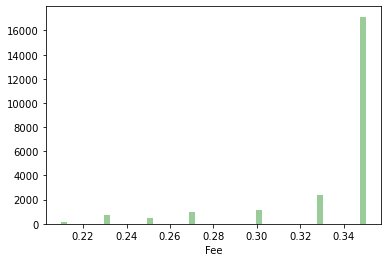

BoxPlot of Fee
----------------------------------------------------------------------------


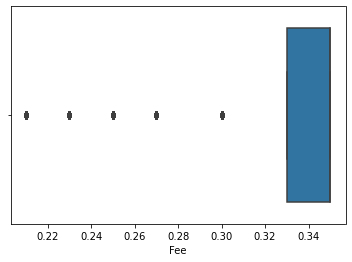

Description of Revenue
----------------------------------------------------------------------------
count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64 Distribution of Revenue
----------------------------------------------------------------------------


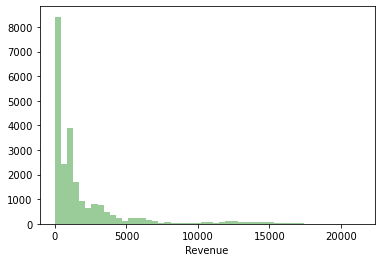

BoxPlot of Revenue
----------------------------------------------------------------------------


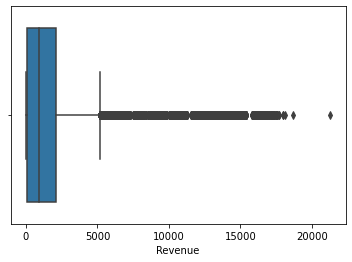

Description of CTR
----------------------------------------------------------------------------
count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64 Distribution of CTR
----------------------------------------------------------------------------


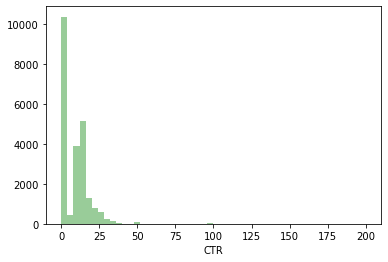

BoxPlot of CTR
----------------------------------------------------------------------------


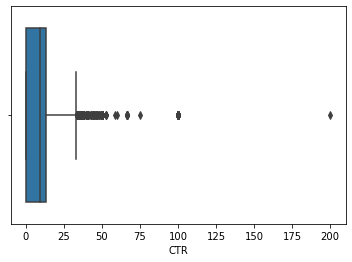

Description of CPM
----------------------------------------------------------------------------
count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64 Distribution of CPM
----------------------------------------------------------------------------


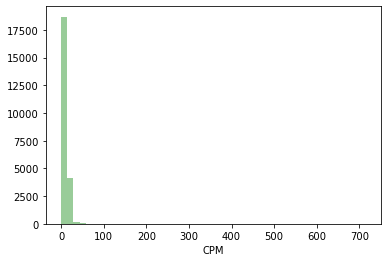

BoxPlot of CPM
----------------------------------------------------------------------------


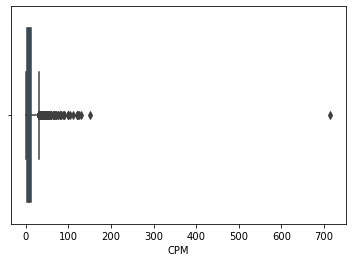

Description of CPC
----------------------------------------------------------------------------
count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64 Distribution of CPC
----------------------------------------------------------------------------


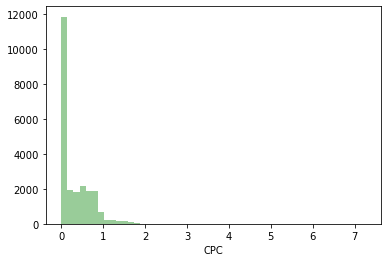

BoxPlot of CPC
----------------------------------------------------------------------------


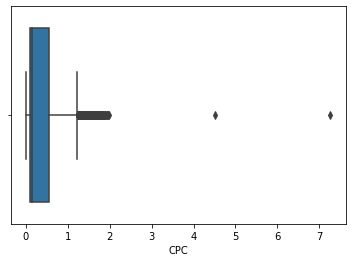

In [88]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)


#### OUTLIER TREATMENT  
K-Means algorithm is sensitive to outliers and may not give best results in case outliers are present in the data.
    The outlier(s) may increases the mean of data significantly and since K-Means algorithm is about finding mean of clusters, the algorithm is influenced by outliers.  
    
Even if the outliers are present in a low percentage, they can have a significant impact on clustering.   
Hence it is better to identify and remove outliers before applying K-means clustering algorithm. 

In [28]:
# To treat outliers lets define a function 'treat_outlier'.  
# For the higher outliers we will treat it to get it at 95 percentile value.  
# Lower level outliers will be treated to get it at 5 percentile value.



def treat_outlier(x):    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    
    dt=np.percentile(x,95)
  
    #calculationg IQR range
    IQR=q75-q25
    
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

for i in df_num[df_num.columns]:    
    df_num[i]=treat_outlier(df_num[i])


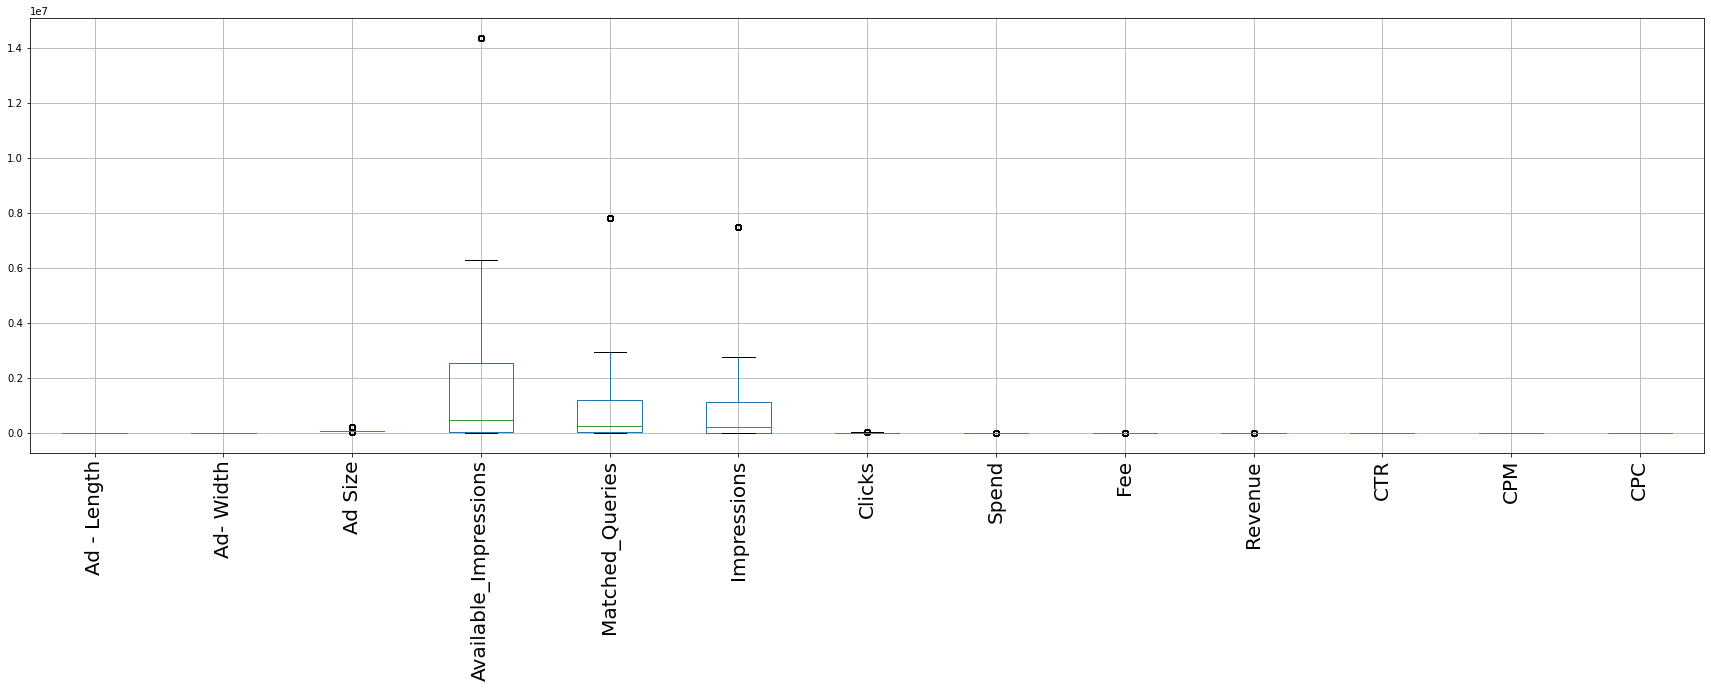

In [31]:
# Boxplot after Outlier treatment (method-1)
df_num.boxplot(figsize=(30,8));
plt.xticks(fontsize=20, rotation=90);
#sns.boxplot(data=df_num[df_num.columns]);

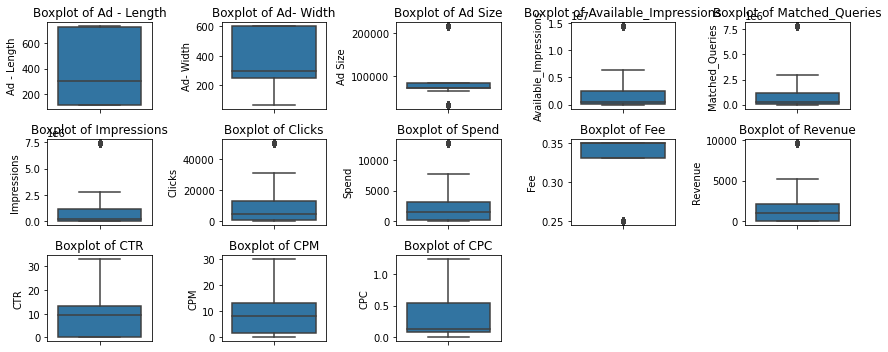

In [32]:
# Boxplot after Outlier treatment (method-2)
plt.figure(figsize = (12,5))
col_list = df_num.columns
for i in range(len(col_list)):
    plt.subplot(3, 5, i + 1)  # 3Rows , 5cols i.e 1 to #c-len
    sns.boxplot(y = df_num[col_list[i]], data = df_num);
    plt.title('Boxplot of {}'.format(col_list[i]));
    plt.tight_layout();

In [33]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23066 entries, 0 to 25854
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  int64  
 1   Ad- Width              23066 non-null  int64  
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 2.5 MB


In [34]:
round(df_num.describe().T,ndigits=2)

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,385.16,233.65,120.00,120.00,300.00,720.00,728.00
Ad- Width,23066.0,337.90,203.09,70.00,250.00,300.00,600.00,600.00
Ad Size,23066.0,97702.99,63200.86,33600.00,72000.00,72000.00,84000.00,216000.00
Available_Impressions,23066.0,2441825.12,4284703.91,1.00,33672.25,483771.00,2527711.75,14363912.25
Matched_Queries,23066.0,1474737.89,2600153.93,1.00,18282.50,258087.50,1180700.00,7803449.00
Impressions,23066.0,1420322.28,2518036.85,1.00,7990.50,225290.00,1112428.50,7473380.25
Clicks,23066.0,9754.19,13550.54,1.00,710.00,4425.00,12793.75,50662.00
Spend,23066.0,2637.37,3649.03,0.00,85.18,1425.12,3121.40,12899.76
Fee,23066.0,0.33,0.04,0.25,0.33,0.35,0.35,0.35
Revenue,23066.0,1905.95,2819.03,0.00,55.37,926.34,2091.34,9674.82


In [45]:
#df_num1 = df_num[['CTR', 'CPM', 'CPC']].copy()
#df_num1.sample(5)

In [ ]:
#df_num1

In [ ]:
#df_num1_cols = df_num1[['CTR','CPM','CPC']]

In [ ]:
#num1_col_list = df_num1_cols.columns

#plt.figure(figsize = (15,10))
#for i in range(len(num1_col_list)):
    #plt.subplot(4, 4, i + 1)  # 4 Rows , 4 cols , 1 to #c-len
    #sns.distplot(df_num1_cols)
    #plt.title('Dist of {}'.format(num1_col_list[i]))
    #plt.tight_layout()

In [ ]:
# importing the StandardScaler Module
#from sklearn.preprocessing import StandardScaler

# Creating an object for the StandardScaler function
#X = StandardScaler()

#### SCALING THE DATA

In [36]:
#Scale the data
from scipy.stats import zscore
df_num_sc = df_num.apply(zscore)

In [37]:
#Check the data post scaling
df_num_sc.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.359227,-0.569484,-0.567061,-0.563943,-0.719779,-0.722776,0.487214,-0.676118,-0.978830,-1.220346,-1.083011
10,-0.364496,-0.432797,-0.359227,-0.569490,-0.567076,-0.563958,-0.719779,-0.722776,0.487214,-0.676118,-0.973650,-1.220346,-1.083011
24,-0.364496,-0.432797,-0.359227,-0.569269,-0.567049,-0.563931,-0.719779,-0.722776,0.487214,-0.676118,-0.982332,-1.220346,-1.083011
50,-0.364496,-0.432797,-0.359227,-0.569339,-0.566994,-0.563875,-0.719779,-0.722776,0.487214,-0.676118,-0.992329,-1.220346,-1.083011
53,-0.364496,-0.432797,-0.359227,-0.569622,-0.567093,-0.563975,-0.719779,-0.722776,0.487214,-0.676118,-0.965826,-1.220346,-1.083011


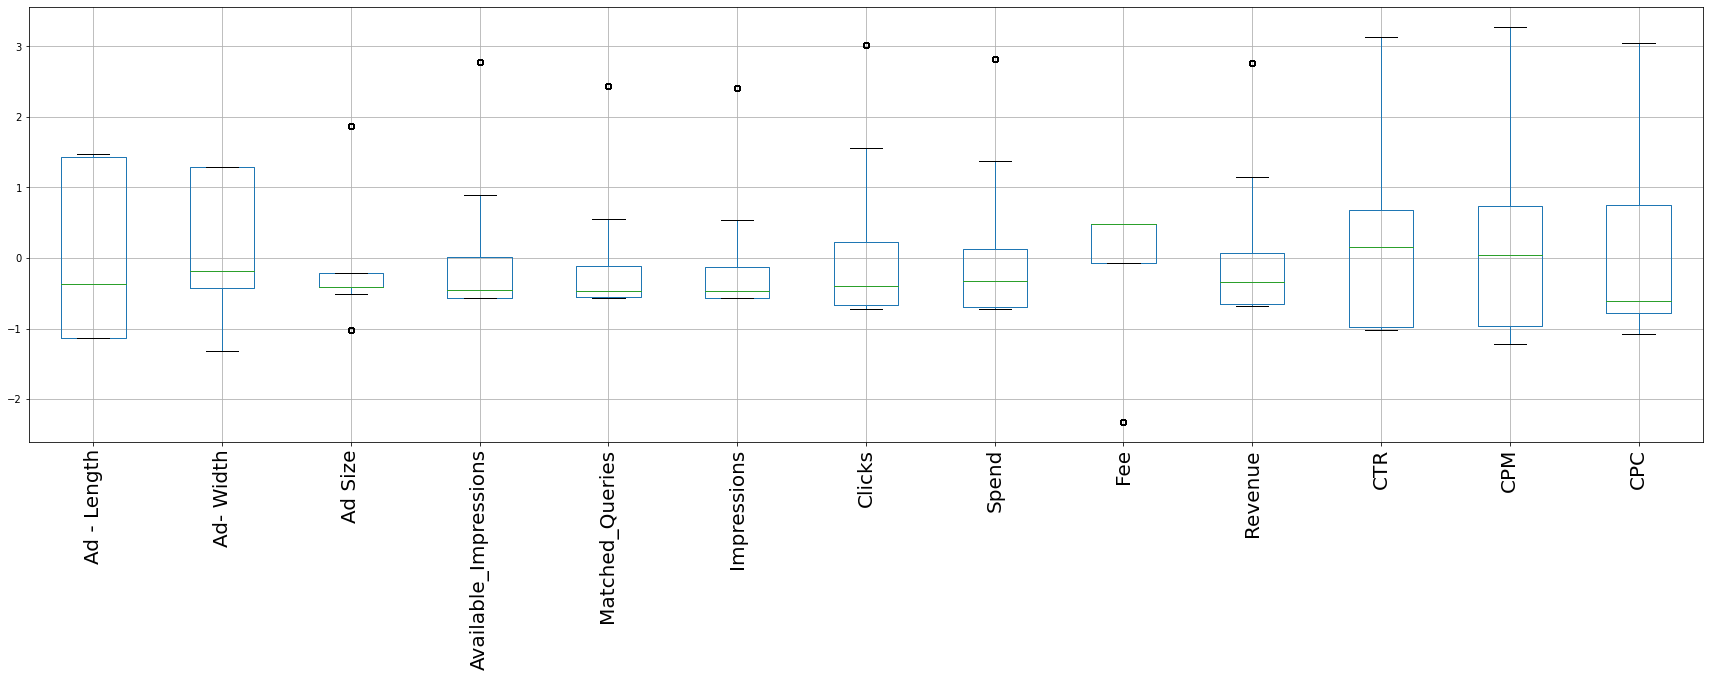

In [38]:
# Boxplot after Outlier treatment (method-2)
df_num_sc.boxplot(figsize=(30,8));
plt.xticks(fontsize=20, rotation=90);
#sns.boxplot(data=df_num[df_num.columns]);

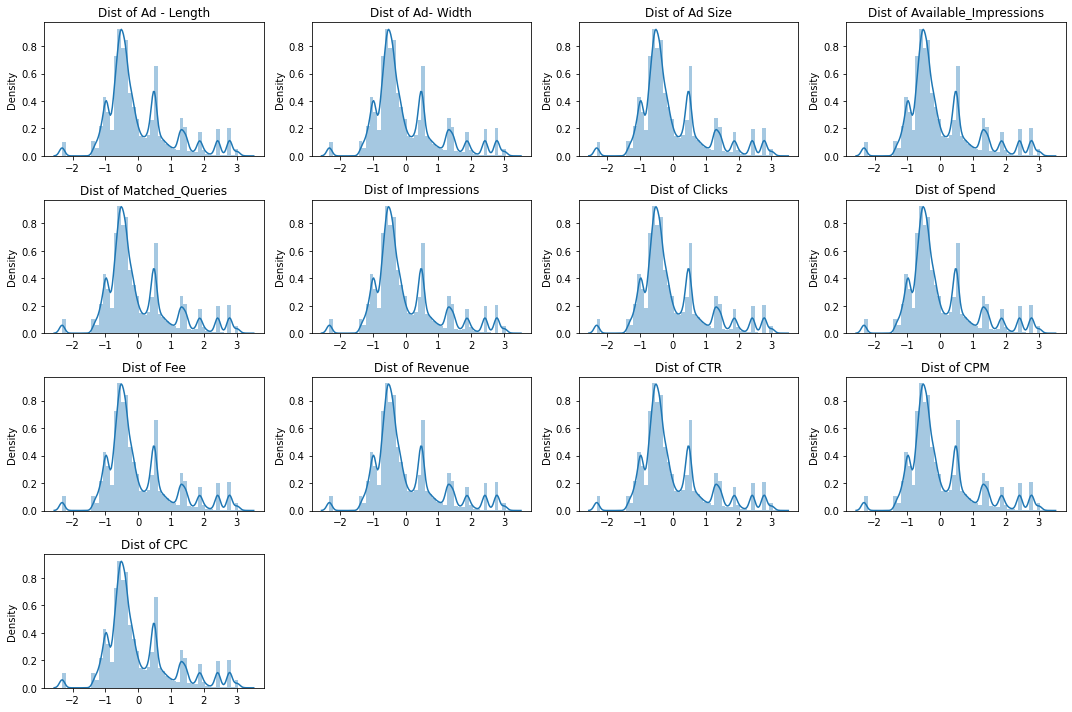

In [39]:
# Plot the distribution of each column in the dataframe.

sc_cols=df_num_sc.columns

plt.figure(figsize = (15,10))
for i in range(len(sc_cols)):
    plt.subplot(4, 4, i + 1)  # 4 Rows , 4 cols , 1 to #c-len
    sns.distplot(df_num_sc)
    plt.title('Dist of {}'.format(sc_cols[i]))
    plt.tight_layout()

In [41]:
df_num_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23066 entries, 0 to 25854
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ad - Length            23066 non-null  float64
 1   Ad- Width              23066 non-null  float64
 2   Ad Size                23066 non-null  float64
 3   Available_Impressions  23066 non-null  float64
 4   Matched_Queries        23066 non-null  float64
 5   Impressions            23066 non-null  float64
 6   Clicks                 23066 non-null  float64
 7   Spend                  23066 non-null  float64
 8   Fee                    23066 non-null  float64
 9   Revenue                23066 non-null  float64
 10  CTR                    23066 non-null  float64
 11  CPM                    23066 non-null  float64
 12  CPC                    23066 non-null  float64
dtypes: float64(13)
memory usage: 2.5 MB


In [42]:
round(df_num_sc.describe().T,ndigits=2)

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,0.0,1.0,-1.13,-1.13,-0.36,1.43,1.47
Ad- Width,23066.0,-0.0,1.0,-1.32,-0.43,-0.19,1.29,1.29
Ad Size,23066.0,-0.0,1.0,-1.01,-0.41,-0.41,-0.22,1.87
Available_Impressions,23066.0,0.0,1.0,-0.57,-0.56,-0.46,0.02,2.78
Matched_Queries,23066.0,-0.0,1.0,-0.57,-0.56,-0.47,-0.11,2.43
Impressions,23066.0,0.0,1.0,-0.56,-0.56,-0.47,-0.12,2.40
Clicks,23066.0,0.0,1.0,-0.72,-0.67,-0.39,0.22,3.02
Spend,23066.0,-0.0,1.0,-0.72,-0.70,-0.33,0.13,2.81
Fee,23066.0,0.0,1.0,-2.32,-0.07,0.49,0.49,0.49
Revenue,23066.0,0.0,1.0,-0.68,-0.66,-0.35,0.07,2.76


### Creating Clusters using HIERARCHIAL CLUSTERING

### DENDOGRAMS
In machine learning, a dendrogram is a visual representation of hierarchical clustering results.   
It helps illustrate the relationships between data points by using branches and clusters.   
The dendrogram is constructed by calculating distances between data points and merging clusters based on their similarity.


The height of each branch indicates the distance at which clusters are merged.   
By analyzing the dendrogram, we can determine the appropriate number of clusters or levels of granularity in our clustering analysis.

#### DENDOGRAM USING WARD's LINKAGE 
A dendrogram created using the Ward's linkage method is a visual representation of hierarchical clustering results.  
Ward's linkage is a distance-based algorithm that minimizes the variance within each cluster when merging them.   

   The dendrogram depicts the hierarchical relationships between data points by using branches and clusters. The height of each branch corresponds to the dissimilarity or distance between clusters.   
   By analyzing the dendrogram, we can determine the optimal number of clusters or levels of granularity in our clustering analysis using Ward's linkage.

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [44]:
wardlink = linkage(df_num_sc, method = 'ward',)

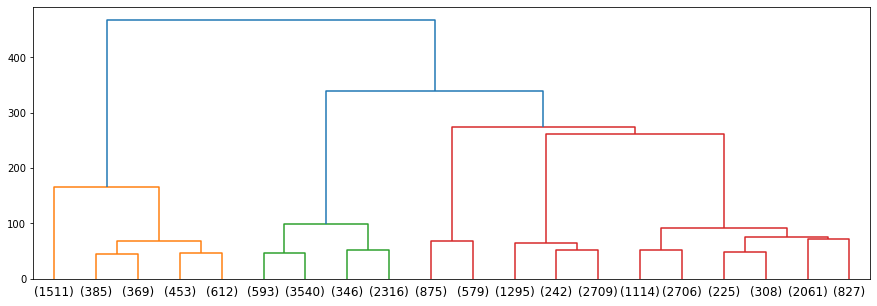

In [45]:
#dend = dendrogram(wardlink)
plt.figure(figsize = (15,5))
dend = dendrogram(wardlink,truncate_mode='lastp',p = 20,)

In [46]:
from scipy.cluster.hierarchy import fcluster

In [47]:
clusters = fcluster(wardlink, 20, criterion='distance')
clusters

array([12, 12, 12, ..., 26, 34, 26], dtype=int32)

In [48]:
df_num_sc['clusters'] = clusters

In [49]:
df_num_sc.sample(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
20031,1.467332,-1.220631,-0.509229,2.782537,2.434028,2.403932,0.665583,2.812427,-2.323289,2.755929,-0.994537,-1.017218,1.383668,2
12719,1.433093,-0.186599,1.871803,-0.477642,-0.489346,-0.495687,0.518722,-0.259628,0.487214,-0.286436,0.205395,0.252342,-0.744628,31
4922,-1.134891,1.290590,-0.406696,-0.567356,-0.564499,-0.562928,-0.695278,-0.710430,0.487214,-0.665732,0.433239,1.126769,-0.628398,36
11149,0.405899,-1.319110,-1.014296,-0.230164,-0.278523,-0.284316,-0.427460,-0.338322,0.487214,-0.352649,-0.947101,-0.921525,0.106828,15
19866,-1.134891,1.290590,-0.406696,-0.308683,-0.258808,-0.293005,3.018972,2.812427,-2.323289,2.755929,0.660462,1.195591,-0.678428,20


In [50]:
df_num_sc.clusters.unique()

# Total 11 clusters formed

array([12, 27, 38, 26, 42, 39, 41, 35, 34, 37, 36, 13, 19, 32, 14, 33, 15,
       31, 29, 40, 18, 30, 16, 28, 25, 22, 17, 11, 10,  9,  7,  8,  5,  6,
       24, 23,  4, 21,  1, 20,  3,  2])

#### DENDOGRAM USING EUCLIDEAN DISTANCES

A dendrogram constructed using the Euclidean distance metric visualizes the hierarchical relationships between data points in a clustering analysis.  
The Euclidean distance measures the straight-line distance between two data points in a multi-dimensional space.  

In the dendrogram, each data point is represented as a leaf, and the branches indicate the similarity or dissimilarity between them based on their Euclidean distances.   
The height of each branch represents the magnitude of the dissimilarity.  

By examining the dendrogram, we can gain insights into the hierarchical structure of the data and make decisions about the appropriate number of clusters or levels of granularity in our clustering analysis using Euclidean distance.

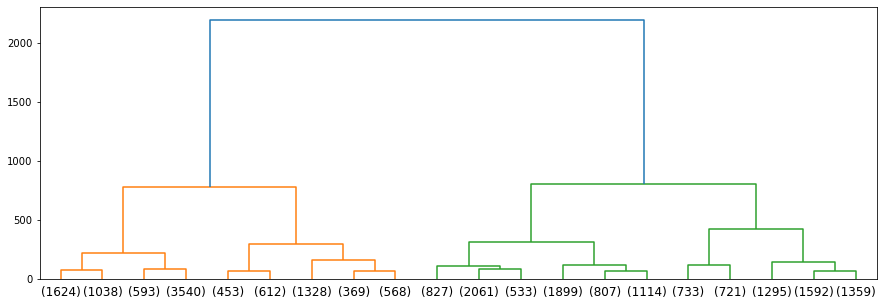

In [51]:
# Dendrogram using Eclidean distance. 
#> we compute the ward linkage using euclidean distance, and visualize it using a dendrogram:

plt.figure(figsize = (15,5))
linkage_data = linkage(df_num_sc, method='ward', metric='euclidean')
dendrogram(linkage_data,truncate_mode='lastp',p = 20,)

plt.show()

### ELBOW PLOT
The elbow plot is a visualization technique to determine the optimal number of clusters in a clustering algorithm.

In an elbow plot, the number of clusters is plotted on the x-axis, and the corresponding "within-cluster sum of squares" (WCSS) or "inertia" is plotted on the y-axis. The WCSS is a measure of how internally coherent each cluster is.

The plot usually shows a downward curve where the WCSS decreases as the number of clusters increases. The "elbow" or "knee" of the curve represents a point where adding more clusters does not significantly reduce the WCSS. This elbow point is considered the optimal number of clusters for the given data set.

The rationale behind the elbow plot is to identify the point where the trade-off between the number of clusters and the quality of clustering is balanced. Too few clusters may result in underfitting, while too many clusters may lead to overfitting. The elbow plot helps in finding the "sweet spot" or the optimal number of clusters based on the specific problem and data set.

By analyzing the elbow plot, machine learning practitioners can make informed decisions about the appropriate number of clusters to use in their clustering algorithms, improving the overall effectiveness of the analysis.


In [52]:
# Elbow plot (till n=10)

from sklearn.cluster import KMeans 

k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(df_num_sc)
k_means.inertia_

64077.4298386532

In [58]:
wss=[]

In [60]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_num_sc)
    wss.append(KM.inertia_)

In [61]:
wss

[3323749.850212432,
 844094.4525228802,
 497565.41570364917,
 269799.0182079398,
 193975.78599335742,
 147249.50001246395,
 108027.18818545263,
 84242.57939303337,
 73664.4615446917,
 64077.42983865322]

In [62]:
a=[1,2,3,4,5,6,7,8,9,10]

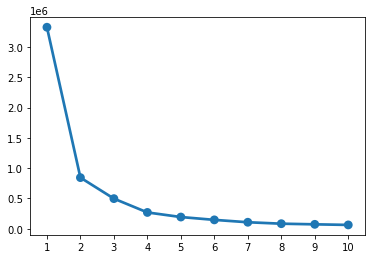

In [69]:
sns.pointplot(x=a, y=wss);

### Cluster evaluation using SILHOUETTE SCORE


The silhouette score is a measure used to evaluate the quality of clustering results.  
It considers both the cohesion within clusters and the separation between clusters.  
The score ranges from -1 to 1, where higher scores indicate better-defined and well-separated clusters.   
A score close to 0 suggests overlapping or poorly separated clusters, while negative scores indicate potential misassignments.  

The silhouette score is a useful tool for comparing different clustering algorithms or parameter settings and determining the optimal number of clusters.

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [71]:
# Getting Silhouette Score clusters from 2 to 14

ss={1:0}
for i in range(2, 15):
    clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    y=clusterer.fit_predict(df_num_sc) # The higher (up to 1) the better
    s =silhouette_score(df_num_sc, y )
    ss[i]=round(s,5) 
    print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.6485
The Average Silhouette Score for 3 clusters is 0.62221
The Average Silhouette Score for 4 clusters is 0.58781
The Average Silhouette Score for 5 clusters is 0.59934
The Average Silhouette Score for 6 clusters is 0.60913
The Average Silhouette Score for 7 clusters is 0.6033
The Average Silhouette Score for 8 clusters is 0.59729
The Average Silhouette Score for 9 clusters is 0.60811
The Average Silhouette Score for 10 clusters is 0.58838
The Average Silhouette Score for 11 clusters is 0.59464
The Average Silhouette Score for 12 clusters is 0.57357
The Average Silhouette Score for 13 clusters is 0.58474
The Average Silhouette Score for 14 clusters is 0.60099


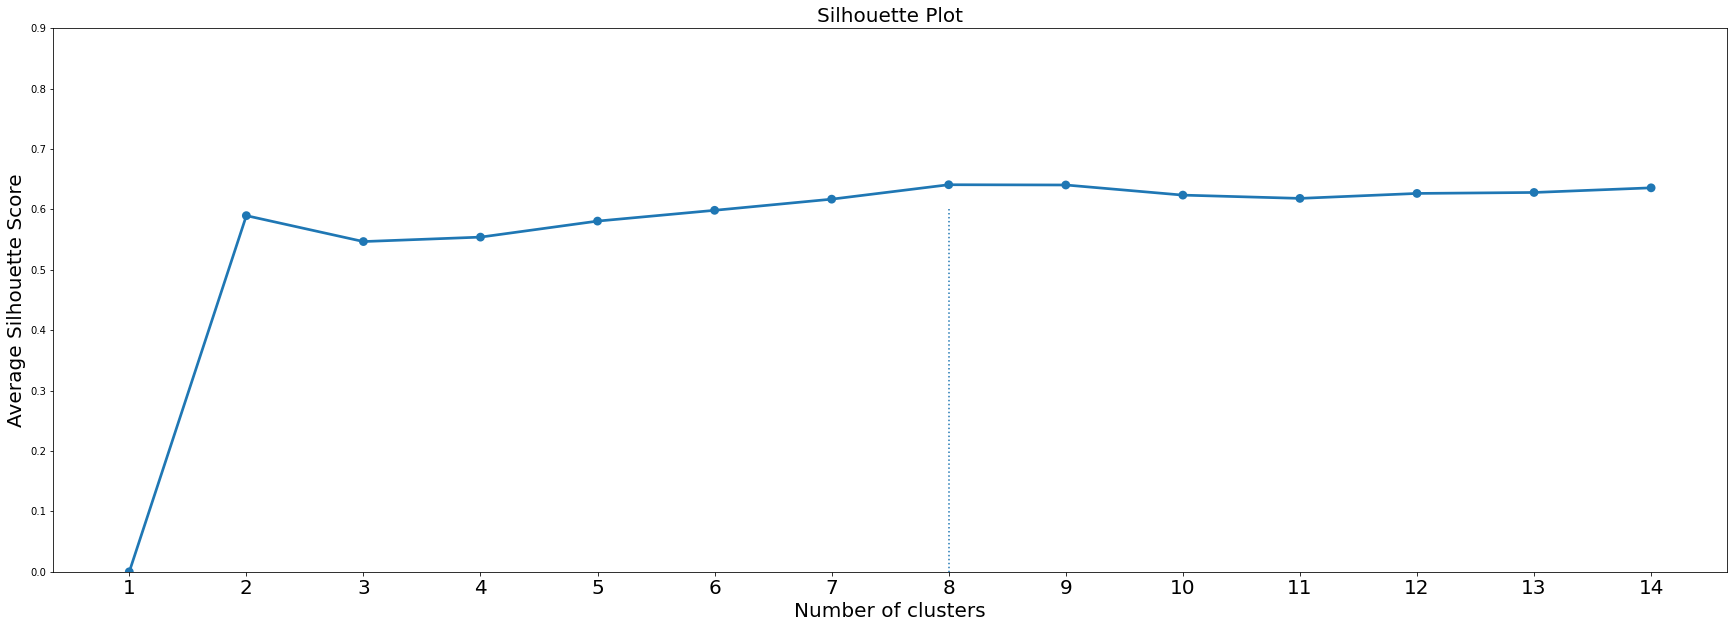

In [121]:
maxkey= [key for key, value in ss.items() if value == max(ss.values())][0]
fig,ax = plt.subplots(figsize=(30,10))
sns.pointplot(list(ss.keys()),list(ss.values()))
plt.vlines(x=maxkey-1,ymax=0,ymin=0.60,linestyles='dotted')
ax.set(ylim=(0, 0.90))
ax.set_title('Silhouette Plot',fontsize=20)
ax.set_xlabel('Number of clusters',fontsize=20)
ax.set_ylabel('Average Silhouette Score',fontsize=20)
plt.xticks(fontsize=20, rotation=0);
plt.show()

It is clear from above plot that the maximum value of average silhouette score is achieved for k = 8, which, therefore, is considered to be the optimum number of clusters for this data.

### Clustering using K-MEANS

K-means clustering is an unsupervised machine learning algorithm used to group data points into k clusters. K is pre-defined.     
It iteratively assigns data points to the nearest centroid and updates the centroids until convergence.   
The algorithm aims to minimize the within-cluster sum of squares and create well-separated clusters.  
One challenge is determining the optimal number of clusters, k.   

K-means clustering is widely used for tasks like customer segmentation and pattern recognition due to its efficiency, but it can be sensitive to initial centroid selection and outliers in the data.

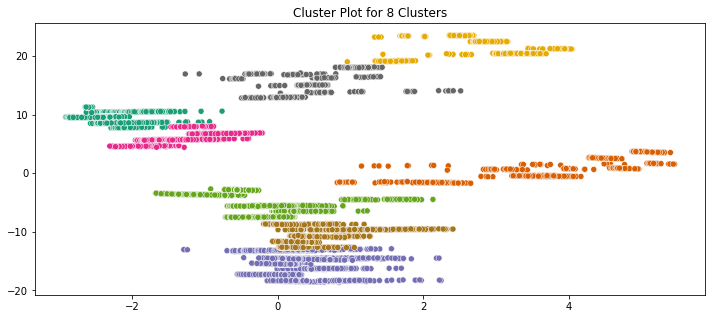

In [73]:
# Creating a PCA object with two components. 
# PCA will reduce the dimensionality of the data to two dimensions.

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df_num_sc)

plt.figure(figsize=(12,5))
sns.scatterplot(x=plot_columns[:,1],y=plot_columns[:,0], hue=KMeans(n_clusters=8, random_state=0).fit(df_num_sc).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 8 Clusters')
plt.show()

In [74]:
# For number of clusters=8, we have got better Silhouette Score. Hence we consider no of clusters = 8 and append the original dataset

k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(df_num_sc)
labels = k_means.labels_

In [75]:
df_num_sc["Clus_kmeans8"] = labels
df_num_sc.sample(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8
23172,-1.134891,1.29059,-0.406696,-0.569619,-0.566829,-0.563866,-0.713728,-0.719536,0.487214,-0.673393,0.992984,2.203543,-0.604457,34,1
3496,-1.134891,1.29059,-0.406696,-0.569203,-0.566835,-0.563729,-0.710554,-0.720394,0.487214,-0.674114,0.816553,0.292325,-0.851250,39,3
4054,-1.134891,1.29059,-0.406696,-0.569264,-0.566675,-0.563570,-0.693654,-0.717673,0.487214,-0.671822,2.509407,0.991772,-0.906755,35,1
6219,-1.134891,1.29059,-0.406696,-0.564660,-0.561867,-0.560857,-0.646054,-0.700723,0.487214,-0.657565,0.532472,0.271243,-0.812599,39,3
4635,-1.134891,1.29059,-0.406696,-0.565381,-0.562935,-0.561802,-0.677935,-0.712778,0.487214,-0.667707,0.229484,-0.262555,-0.867188,39,3


#### For Ad_profiling, lets consider the number of Clusters 4 

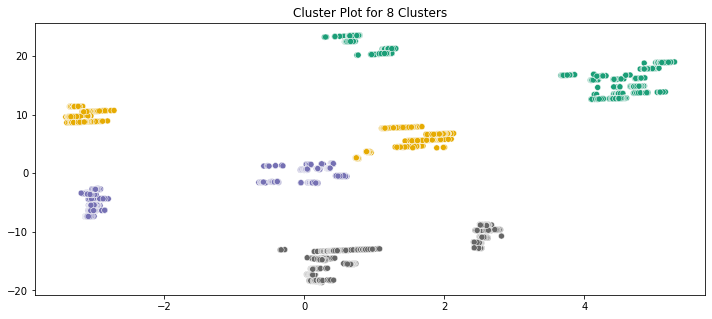

In [76]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(df_num_sc)
plt.figure(figsize=(12,5))
sns.scatterplot(x=plot_columns[:,1],y=plot_columns[:,0], hue=KMeans(n_clusters=4, random_state=0).fit(df_num_sc).labels_, palette='Dark2_r',legend=False)
plt.title('Cluster Plot for 8 Clusters')
plt.show()

In [77]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_num_sc)
labels = k_means.labels_

In [78]:
df_num_sc["Clus_kmeans4"] = labels
df_num_sc.sample(5)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8,Clus_kmeans4
15049,-0.210417,-0.432797,-0.216821,0.035184,-0.028992,-0.016331,-0.439711,-0.056835,0.487214,-0.115810,-0.983142,-0.955979,1.068126,18,2,3
22131,-0.364496,-0.432797,-0.359227,2.782537,2.434028,2.403932,0.176219,0.702822,-2.323289,0.615615,-0.989514,-1.076060,0.356668,5,0,0
3751,1.433093,-0.186599,1.871803,-0.569368,-0.566619,-0.563572,-0.708931,-0.719377,0.487214,-0.673259,0.459787,0.259847,-0.801464,27,6,2
24997,-1.134891,1.290590,-0.406696,-0.569848,-0.567147,-0.564033,-0.718451,-0.722252,0.487214,-0.675678,1.465874,1.764996,-0.745202,34,1,1
21382,-0.364496,-0.432797,-0.359227,-0.024519,-0.155404,-0.150972,-0.540152,-0.234462,0.487214,-0.265262,-0.988304,-0.963312,1.375991,19,2,3


In [79]:
Ad_profile=df_num_sc.groupby('Clus_kmeans4').mean()
Ad_profile['freq']=df_num_sc.Clus_kmeans4.value_counts().sort_index()
round(Ad_profile,ndigits=2)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8,freq
Clus_kmeans4,,,,,,,,,,,,,,,,
0,0.44,-0.73,-0.35,2.18,2.35,2.37,0.21,1.60,-1.60,1.53,-0.99,-0.99,1.37,5.45,2.27,3330
1,-0.97,1.09,-0.22,-0.54,-0.54,-0.54,-0.49,-0.62,0.48,-0.59,0.86,0.84,-0.69,36.67,1.94,7241
2,1.09,-0.02,1.57,-0.50,-0.50,-0.50,0.76,-0.19,0.16,-0.20,0.64,0.58,-0.77,28.16,5.71,4967
3,0.02,-0.72,-0.67,-0.12,-0.19,-0.19,-0.12,0.01,0.15,0.02,-0.81,-0.75,0.57,16.12,4.94,7528


In [80]:
Ad_profile=Ad_profile.drop([ 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Available_Impressions','Matched_Queries', 'Impressions','Fee'],axis=1)
Ad_profile

,Clicks,Spend,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans8,freq
Clus_kmeans4,,,,,,,,,
0,0.205772,1.598414,1.529334,-0.990923,-0.989263,1.367987,5.445646,2.268769,3330
1,-0.485523,-0.618027,-0.587457,0.857577,0.839612,-0.693186,36.665102,1.944897,7241
2,0.759213,-0.189346,-0.203804,0.636611,0.581763,-0.774047,28.160459,5.709684,4967
3,-0.124942,0.012340,0.023032,-0.806587,-0.753852,0.572351,16.116100,4.939825,7528


#CPM = (Total Campaign Spend / Number of Impressions) * 1,000  
#CPC = Total Cost (spend) / Number of Clicks  
#CTR = Total Measured Clicks / Total Measured Ad Impressions x 100  


Cluster 0: This cluster exhibits the highest Click-Through Rate (CTR) and Cost Per Mille (CPM), indicating a high number of clicks relative to the number of impressions. Additionally, it has the lowest Cost Per Click (CPC), suggesting a lower cost for each click. The total cost is low, but the response in terms of clicks is high.

Cluster 1: In this cluster, the CTR and CPM are the lowest, indicating a low number of clicks compared to impressions. However, the Cost Per Click (CPC) is the highest, suggesting a higher cost for each click. The total cost is high, but the response in terms of clicks is lower.

Cluster 2: This cluster displays a high CTR and CPM, indicating a relatively high number of clicks compared to impressions. The Cost Per Click (CPC) is comparatively lower than in Cluster 1. The total cost is high, but the response in terms of clicks is lower.

Cluster 3: This cluster shows average values for CTR, CPM, and CPC. The cost and response (clicks) are at an average level.